In [1]:
#importing the depedencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Data collection and Analysis
dataset = pd.read_csv('insurance.csv')

In [3]:
#Showing the dataset
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#Checking the number of rows and columns of the dataset
dataset.shape

(1338, 7)

In [5]:
#Checking to see the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Checking to see if there are null values in the dataset
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#from the dataset we can infer that the categorical values are 'sex', 'smoker' and 'region', therefore
print(dataset['sex'].value_counts())
print(dataset['smoker'].value_counts())
print(dataset['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


C:\Users\DELL INSPIRON 15\AppData\Local\Temp\ipykernel_5592\1757699075.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


<function matplotlib.pyplot.show(close=None, block=None)>

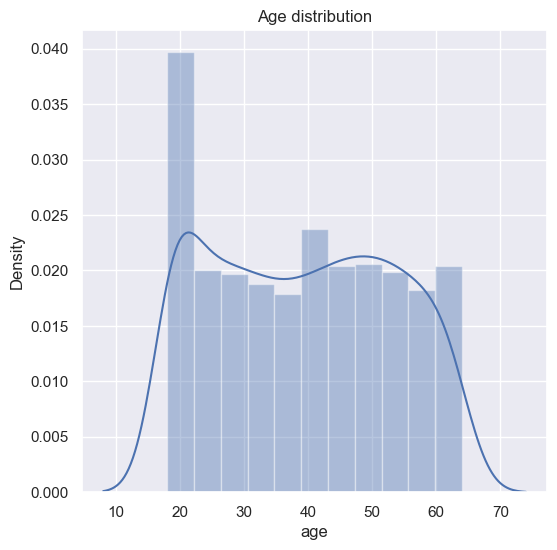

In [8]:
#Checking the distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.title('Age distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

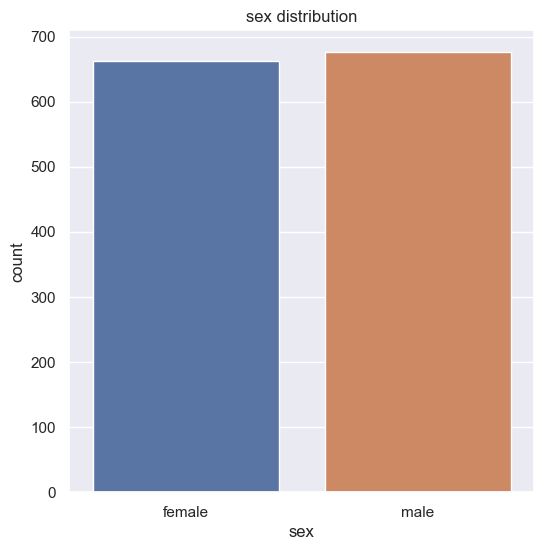

In [9]:
#gender column
plt.figure(figsize = (6,6))
sns.countplot(x='sex', data = dataset)
plt.title('sex distribution')
plt.show

C:\Users\DELL INSPIRON 15\AppData\Local\Temp\ipykernel_5592\3745752376.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['bmi'])


<function matplotlib.pyplot.show(close=None, block=None)>

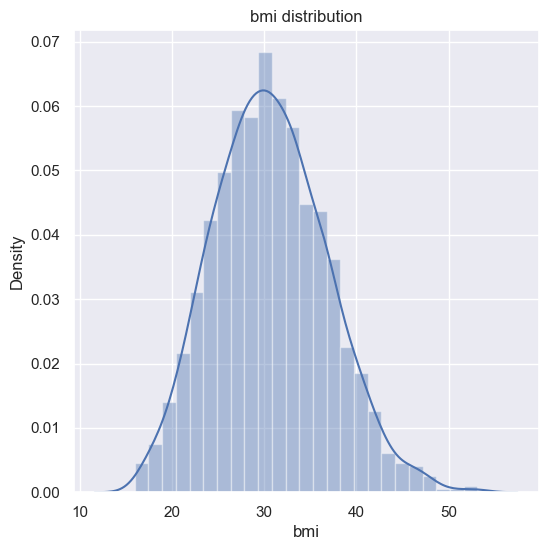

In [10]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'])
plt.title('bmi distribution')
plt.show

In [11]:
#Normal bmi range : 18.5 to 24.9, meaning from the plot above, most of the children are slightly overweight

<function matplotlib.pyplot.show(close=None, block=None)>

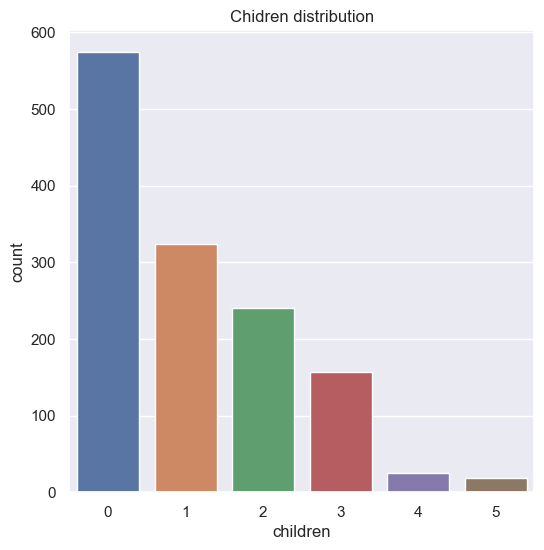

In [12]:
plt.figure(figsize = (6,6))
sns.countplot(x='children', data = dataset)
plt.title('Chidren distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

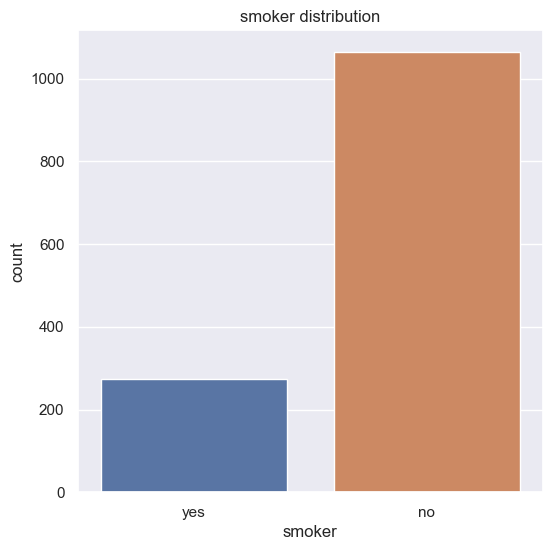

In [13]:
plt.figure(figsize = (6,6))
sns.countplot(x='smoker', data = dataset)
plt.title('smoker distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

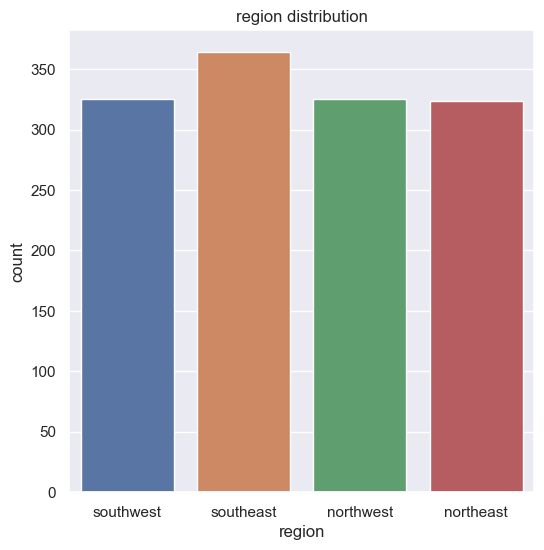

In [14]:
plt.figure(figsize = (6,6))
sns.countplot(x='region', data = dataset)
plt.title('region distribution')
plt.show

In [15]:
#Data preprocessing
#Encoding the categorical features
dataset['sex'] = np.where(dataset['sex'] == 'male', 0,1)

In [16]:
dataset['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

In [17]:
dataset['smoker'] = np.where(dataset['smoker'] == 'yes', 1,0)

In [18]:
dataset['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [19]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [23]:
mapping = {
    'southeast' : 0,
    'southwest' : 1,
    'northwest' : 2,
    'northeast' : 3
}

In [24]:
dataset['region'] = dataset['region'].map(mapping)

In [25]:
dataset['region'].value_counts()

0    364
1    325
2    325
3    324
Name: region, dtype: int64

In [26]:
#Splitting the features and target
X = dataset.iloc[:,:-1]
y = dataset['charges']

In [27]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [28]:
#Spltting the data into training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [29]:
print(X.shape, X_train.shape, y_test.shape)

(1338, 6) (1070, 6) (268,)


In [30]:
#Model training using Linear Regression
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
train_pred = model.predict(X_train)

In [34]:
#using R2 score
r2_train = metrics.r2_score(y_train, train_pred)
print('R square value :', r2_train)

R square value : 0.7518195459072954


In [36]:
test_pred = model.predict(X_test)
r2_test = metrics.r2_score(y_test, test_pred)
print('R square value :', r2_test)

R square value : 0.7454471618659976


In [37]:
#Building a Predictive system

input_data = (30,1,32.4,1,0,1)
input_as_array = np.array(input_data)
reshaped_input_array = input_as_array.reshape(1, -1)
prediction = model.predict(reshaped_input_array)
print(prediction)

print("The Insurance cost is USD",prediction[0])


[6482.56356044]
The Insurance cost is USD 6482.563560441347


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
